# Home Assignment No. 2: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

## Task 1.1. Boosting, part 1. (2 points)


> Boosting Machines (BM) are a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, that perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is acheived by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in [Lecture 7](https://github.com/adasegroup/ML2020_lectures).

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

#### Place for ypur solution

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

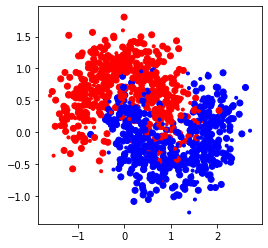

In [7]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)

base classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

* `ada_boost_alpha` - function, which calculates the weights of the linear combination of the classifiers
* `ada_boost_distribution` - function, which calculates sample weights

Implement htese procedures

In [0]:
### Now let us define functions to calculate alphas and distributions for AdaBosot algorithm

def ada_boost_alpha(y, y_pred_t, distribution):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    N = np.sum(distribution * (y*y_pred_t <= 0).astype(int))
    alpha = 0.5*np.log((1-N)/N)
    return alpha

In [0]:
def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    distribution = distribution*np.exp(-alpha_t*y*y_pred_t)
    distribution = distribution /np.sum(distribution)
    return distribution

Our custom boosting class

In [0]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            # ======= Your code here ======
            
            # make a prediction
            y_pred_t = self.classifiers[-1].predict(X)
            
            #update alphas, append new alpha to self.alphas
            alpha = self.get_alpha(y, y_pred_t, distribution)
            self.alphas.append(alpha)
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred_t,distribution,alpha)
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])

        # ====== Your code here ======
        #get the weighted votes of the classifiers
        for b,c in zip(self.alphas,self.classifiers):
          final_predictions += b*c.predict(X)
        out = np.sign(final_predictions)       
        return out

In [16]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [0]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


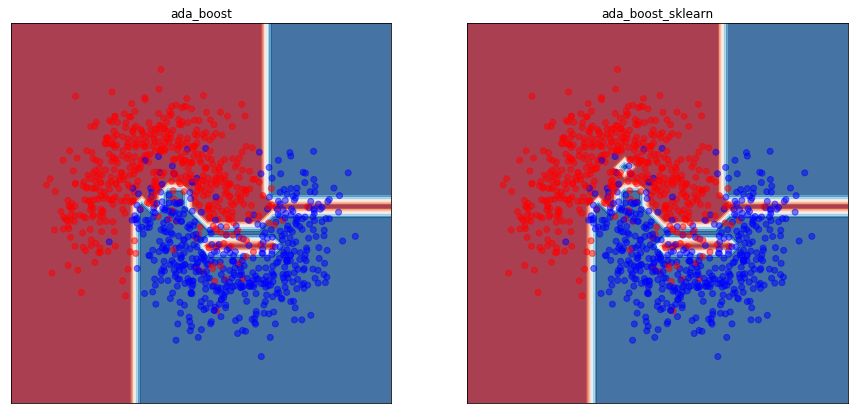

In [18]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 1.2. Boosting, part 2. (2 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to instead recompute all of the alphas after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the avaliable estimators. Take into account, that at each step of the boosting algorithm **all** alphas and, consequntly, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the reguralization parameter([Lecture 2, slide 14](https://github.com/adasegroup/ML2020_lectures/blob/master/lecture2/Lecture_2_Regression.pdf)). Add it in order to guarantee the existence of the solution.

In [0]:
from scipy.optimize import minimize

In [0]:
 def recompute_alpha(y, y_pred, C):

    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    # ====== Your code here =====
    y_pred = np.array(y_pred)
    #n =  y_pred.shape[0]
    alpha_z = np.random.uniform(1,size=(y_pred.shape[0])).reshape(-1,1)
    alphas_f = lambda alpha: np.mean(np.exp(-y*np.dot(alpha,y_pred))) + C* np.linalg.norm(alpha)**2
    alphas = minimize(alphas_f,alpha_z)
    #alphas = alphas["x"]
    return alphas['x']

    #y_pred = np.array(y_pred)
    #alphas = minimize(loss_,(np.ones(y_pred.shape[:1])/y.shape[1]),)
    #alphas = np.array(alphas.x)
    #return alphas



    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """

    # ====== Your code here =====
    y_pred = np.array(y_pred)
    alphas =  np.array(alphas).reshape(-1,1)  
    #distribution = np.exp(-y*y2)
    #for alph, y1 in zip(alphas,y_pred):
    distribution = np.exp(-y*np.dot(alphas.T,y_pred))
    #distribution /= distribution.sum()
    return distribution.reshape(-1)    

In [0]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            # ======= Your code here ======
            # create a list of predictions across all classifiers
            pred_list = []
            for clf in self.classifiers:
              pred_list.append(clf.predict(X))
            # recalculate alphas, add them to the matrix of self.alphas 
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            alphas = recompute_alpha(y,pred_list,self.C)
            self.alphas[0:len(alphas),i] = alphas        
            #.append(self.get_alpha(y,pred_list, self.C))  
            #self.alphas.append(self.get_alpha(y,pred_list, self.C))          
            # update distribution and normalize

            distribution = np.ones(n_samples,dtype=float)/n_samples 
            d_list = distribution*recompute_distribution(y,pred_list,alphas) 
            distribution = d_list/sum(d_list)            

    
    def predict(self, X):
        final_predictions = 0
    
        # ====== Your code here ======
        #get the weighted votes of the classifiers
        #do not forget that self.alphas is the whole history of recalculated alphas!
        for b,c in enumerate(self.classifiers):
          final_predictions += self.alphas[i,-1]*c.predict(X)
        out = np.sign(final_predictions)       
        return out   
        


In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShe

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [0]:

classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.89
accuracy ada_boost_sklearn: 0.875


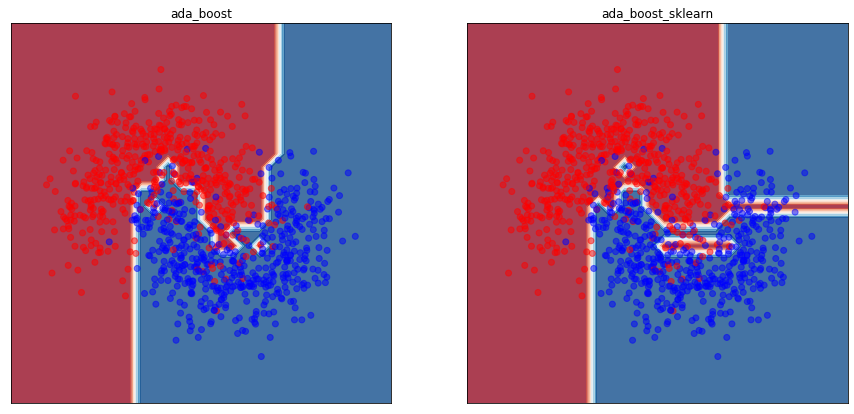

In [24]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

In [0]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

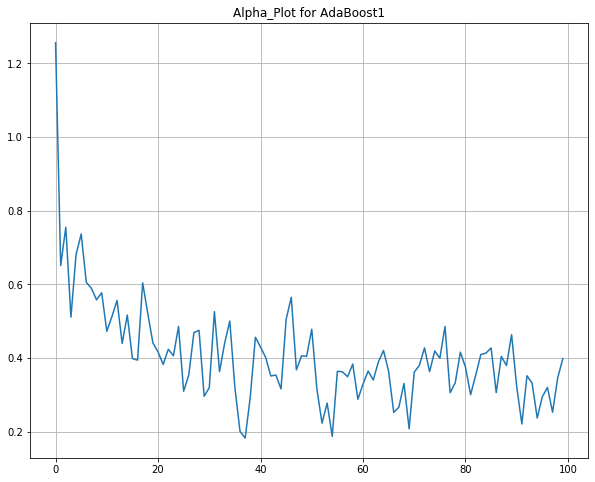

In [72]:
## Plot the resulting alphas (last calculated in case of recomputed alphas)
plt.subplots(figsize=(10,8))
plt.title("Alpha_Plot for AdaBoost1")
plt.plot(range(len(ada_boost1.alphas)),ada_boost1.alphas)
plt.grid()

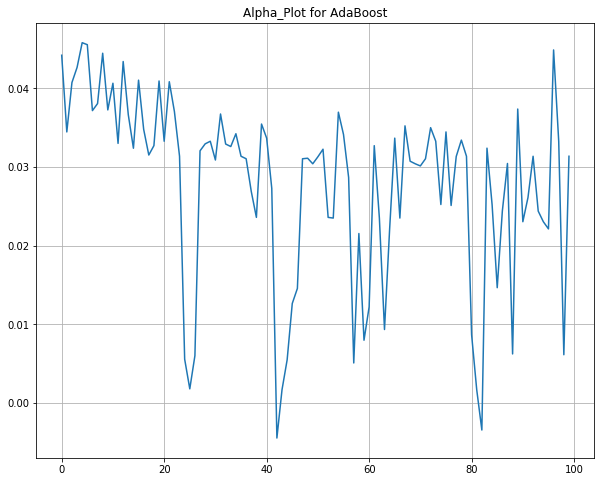

In [74]:
ada_boost.alphas[:,-1]
plt.subplots(figsize=(10,8))
plt.title("Alpha_Plot for AdaBoost")
plt.plot(range(ada_boost.alphas.shape[0]),ada_boost.alphas[:,-1])
plt.grid()

In [0]:
## Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) 
## for AdaBoost and RecomputedAdaBoost

SCORE_ = [] #Empty list for value storage...AdaBoost
m = len(ada_boost1.classifiers)
for i in range(m):
  SCORE_.append(score(np.flip(construct_alpha_history(ada_boost1.alphas))[0:i+1,i],
                      ada_boost1.classifiers[0:i+1],X_test,y_test))

SCORE_2 = []  #Scores for recomputed AdaBoost
n = len(ada_boost.classifiers)
for i in range(n):
  SCORE_2.append(score(np.flip(construct_alpha_history(ada_boost1.alphas))[0:i+1,i],
                       ada_boost.classifiers[0:i+1],X_test,y_test))

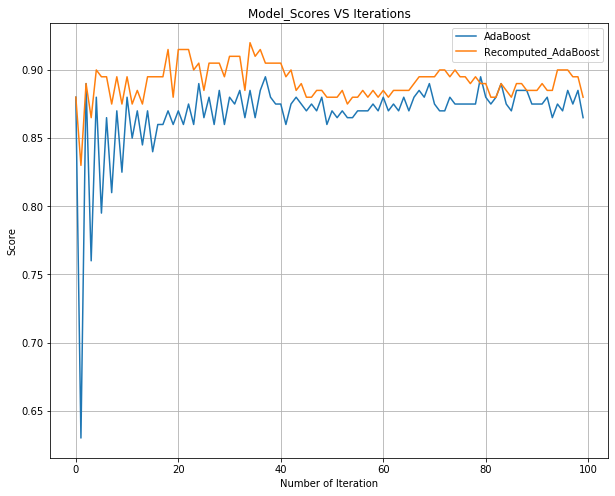

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Model_Scores VS Iterations')
ax.plot(SCORE_,label="AdaBoost")
ax.plot(SCORE_2,label="Recomputed_AdaBoost")
ax.set(xlabel = "Number of Iteration", ylabel = "Score")
legend = ax.legend()
ax.grid(True)
plt.show()

Make a conclusion about which method is better and in which case. 

 - The first AdaBoost implementation  method gave same accuracy as that of AdaBoost scikit learn

- However, the recomputed Adaboost method gave a slight improvement to that of the AdaBoost scikit learn

- For my implementation, as the number of iteration increases, the recomputedAdaboost gave a better score than the initial AdaBoost

- recomputed AdaBoost has a higher time of execution compared to the first one

## Task 2. Gradient Boosting and Feature Selection (1 point)

Gradient Boosting Machines (GBM) are a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are the extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one varinat of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterwards, compare the models' feature importances. 

**The task**
* train the XGBoost classifier on the provided dataset
  * measure the training time
  * measure the precision/recall on the test set
  * plot ROC-curve

* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

* compare the feature importances of the trained XGBoost and Random Forest Classifiers. Why do you think they are different? Explain.

* for each model, sort the features by their importance, and plot the dependence of the test score on the number of features selected by best importance

*Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall.

**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

Make sure that you have installed the XGBoost package before starting the task. 

**HINT**: in order to measure the training time you can use [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [0]:


print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (1999, 15)
x_test shape:  (1334, 15)
y_train shape:  (1999,)
y_test shape:  (1334,)


* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the precision/recall on the test set
* plot ROC-curve
* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

In [0]:
###YOUR CODE###
#train the XGBoost classifier on the provided dataset
clf_XGB = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, learning_rate=0.1)
clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
#measuring the training time
%timeit clf_XGB.fit(X_train, y_train)

1 loop, best of 3: 653 ms per loop


In [0]:
#measure the precision/recall on the test set
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = clf_XGB.predict(X_test)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
print("Precision: ",p)
print("Recall: ",r)

Precision:  0.9023319703552262
Recall:  0.7765211892874551


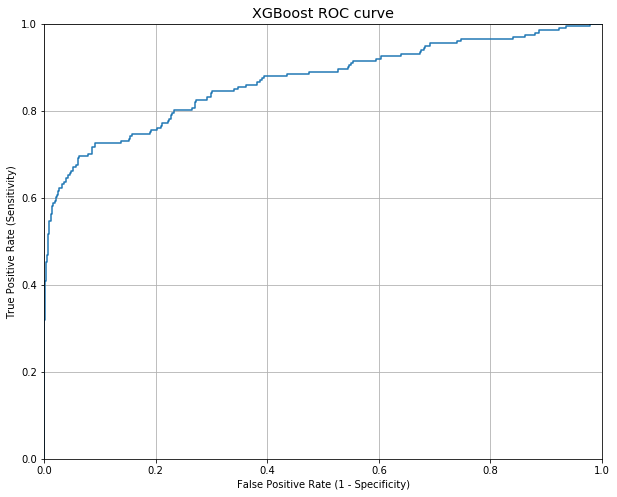

In [0]:
#plot ROC curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,8))
y_PredProb=clf_XGB.predict_proba(X_test)
y_PredProb=y_PredProb[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_PredProb)  
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('XGBoost ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
from sklearn.metrics import roc_auc_score
AUC=roc_auc_score(y_test,y_pred)
print('AUC is: ', AUC)

AUC is:  0.776521189287455


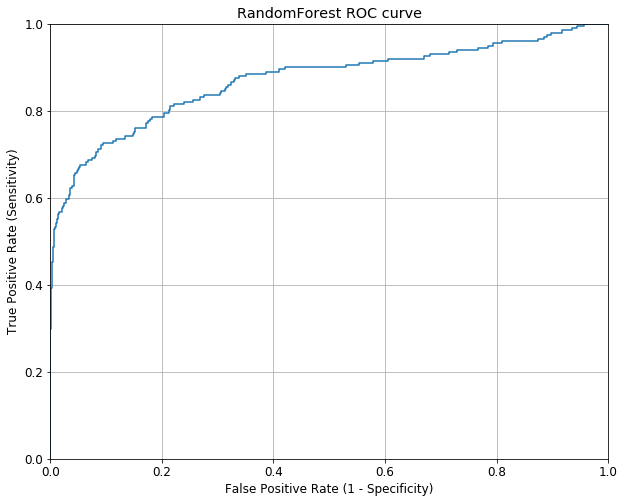

In [0]:
#Train Random Forest classifier and compare it to XGBoost (plot ROC-curve)
Clf_RF = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
Clf_RF.fit(X_train,y_train)
plt.figure(figsize=(10,8))
y_RFpred = Clf_RF.predict(X_test)
y_RFProb=Clf_RF.predict_proba(X_test)
y_RFProb=y_RFProb[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_RFProb)  
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('RandomForest ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
#plot ROC curve for RandomForest
AUC2=roc_auc_score(y_test,y_RFpred)
print('AUC is: ', AUC2)

AUC is:  0.7146526853815652


- Comparison from the ROC_Curves;

- Both XGBoost and RandomForest gave similar output in terms of ROC curve

- Although XGBoost covers slightly higher value of Area than Random Forest as indicated by their AUC values

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

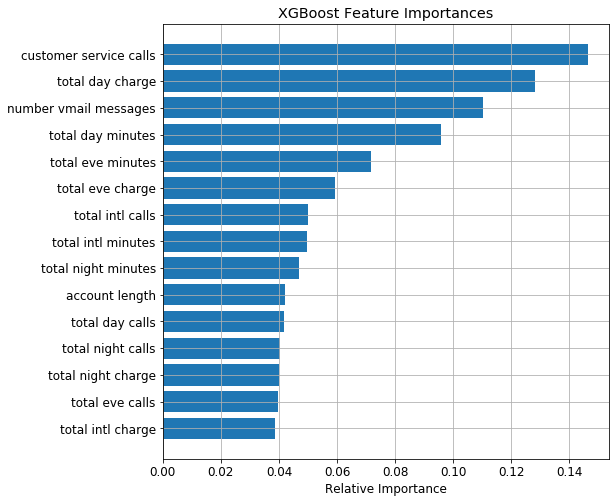

In [0]:
###YOUR CODE###
DF_list = list(data.columns)  
x_importances = clf_XGB.feature_importances_
x_indices = np.argsort(x_importances)
fig, ax = plt.subplots(figsize=(8,8))
plt.title('XGBoost Feature Importances')
plt.barh(range(len(x_indices)), x_importances[x_indices], align='center')
plt.yticks(range(len(x_indices)), [DF_list[i] for i in x_indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()



In [0]:
       #saving the features lists
DF_list = list(data.columns)        
xgb_importance = list(clf_XGB.feature_importances_)   # Get numerical feature importances
x_FI = [(feature, round(importance, 3)) for feature, importance in zip(DF_list,xgb_importance)]
x_FI = sorted(x_FI, key = lambda x: x[1], reverse = True) #Sorting by order of importance
x_FI = pd.DataFrame(x_FI)
x_FI=x_FI.rename(columns={0:'Features Used'})
x_FI=x_FI.rename(columns={1:'Level of Importance(/10)'})
x_FI=x_FI.set_index('Features Used')
x_FI

,Level of Importance(/10)
Features Used,
customer service calls,0.146
total day charge,0.128
number vmail messages,0.110
total day minutes,0.096
total eve minutes,0.072
total eve charge,0.059
total intl minutes,0.050
total intl calls,0.050
total night minutes,0.047


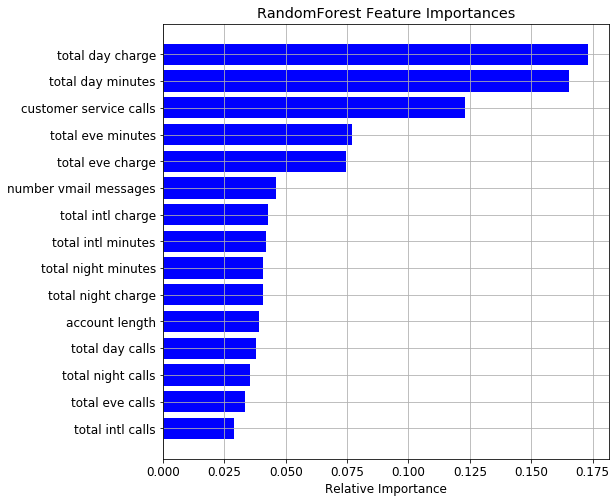

In [0]:
DF_list = list(data.columns)  
importances = Clf_RF.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(8,8))
plt.title('RandomForest Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [DF_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()

In [0]:
       #saving the features lists
Features_importance = list(Clf_RF.feature_importances_)   # Get numerical feature importances
FI = [(feature, round(importance, 3)) for feature, importance in zip(DF_list,Features_importance)]
FI = sorted(FI, key = lambda x: x[1], reverse = True) #Sorting by order of importance
FI = pd.DataFrame(FI)
FI=FI.rename(columns={0:'Features Used'})
FI=FI.rename(columns={1:'Level of Importance(/10)'})
FI=FI.set_index('Features Used')
FI

,Level of Importance(/10)
Features Used,
total day charge,0.173
total day minutes,0.165
customer service calls,0.123
total eve minutes,0.077
total eve charge,0.075
number vmail messages,0.046
total intl charge,0.043
total intl minutes,0.042
total night minutes,0.041


- There feature importances are different as for both Model as shown above;

- while XGBoost takes "customer service calls"
"total day charge" and "number vmail messages" as the 3-most important features, 

- RandomForest takes "total day charge",	"total day minutes", and "customer service calls " as its 3-most important features

- This is because the preferencing of the Models to the choice of features divers as well

- Basically, for XGBoost when there are several correlated features, it will tend to choose one and use it in several trees. Other correlated features won t be used a lot.


- For Random Forest howwver, each tree is not built from the same features, there is a random selection of features to use for each tree. Each correlated feature may have the chance to be selected in one of the tree.

- This contributes to the slight difference in feature importance

* Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall. **HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

In [0]:
###YOUR CODE###
from sklearn.feature_selection import SelectFromModel
RF = Clf_RF
XGB = clf_XGB
clfs = [RF,XGB]

RF_Recall = []
RF_Precision = []

XGB_Recall = []
XGB_Precision = []


for c in clfs:
  importance_ = sorted(c.feature_importances_)
  n = len(importance_)
  for i in range(n):
    selector = SelectFromModel(c, threshold=importance_[i])
    selector.fit(X_train,y_train) 
    #Applying the feature changes in the train and test sets by using "transforms"
    X_ttrain = selector.transform(X_train)
    X_ttest = selector.transform(X_test)
    #Fitting each classifiers on the changed set
    c.fit(X_ttrain,y_train)
    y_pred = c.predict(X_ttest)
    score_r = recall_score(y_test,y_pred)
    score_p = precision_score(y_test,y_pred)
    #for c in clfs:
    if c == RF:
      RF_Recall.append(score_r)     
      RF_Precision.append(score_p)
    else:
      XGB_Recall.append(score_r)     
      XGB_Precision.append(score_p)



In [0]:
print("Random Forest precision: ", RF_Precision)
print("Random Forest recall: ", RF_Recall)

Random Forest precision:  [0.9560439560439561, 0.9292929292929293, 0.9306930693069307, 0.918918918918919, 0.9380530973451328, 0.9224137931034483, 0.9224137931034483, 0.8666666666666667, 0.8728813559322034, 0.8790322580645161, 0.8114754098360656, 0.8166666666666667, 0.6808510638297872, 0.5084745762711864, 0.5]
Random Forest recall:  [0.43283582089552236, 0.4577114427860697, 0.46766169154228854, 0.5074626865671642, 0.527363184079602, 0.5323383084577115, 0.5323383084577115, 0.5174129353233831, 0.5124378109452736, 0.5422885572139303, 0.4925373134328358, 0.48756218905472637, 0.31840796019900497, 0.14925373134328357, 0.14427860696517414]


In [0]:
len(XGB_Precision)

15

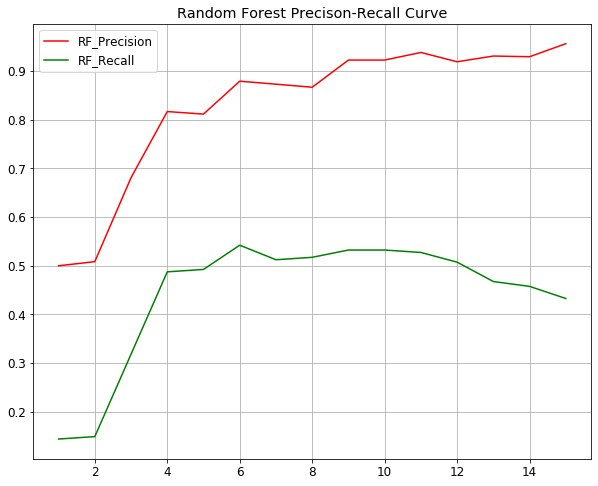

In [0]:
m_ = range(1,16)
plt.figure(figsize=[10,8]) 
plt.plot(m_[::-1],RF_Precision,'r',label="RF_Precision")
plt.plot(m_[::-1],RF_Recall,'g',label="RF_Recall")
plt.title("Random Forest Precison-Recall Curve")
plt.grid()
plt.legend()

In [0]:
print("XGB precision: ", XGB_Precision)
print("XGB recall: ", XGB_Recall)

XGB precision:  [0.8769230769230769, 0.9024390243902439, 0.92, 0.905511811023622, 0.912, 0.90625, 0.9015151515151515, 0.7567567567567568, 0.7972972972972973, 0.8283582089552238, 0.8308823529411765, 0.7181818181818181, 0.7407407407407407, 0.6464646464646465, 0.6326530612244898]
XGB recall:  [0.5671641791044776, 0.5522388059701493, 0.572139303482587, 0.572139303482587, 0.5671641791044776, 0.5771144278606966, 0.5920398009950248, 0.5572139303482587, 0.5870646766169154, 0.5522388059701493, 0.5621890547263682, 0.39303482587064675, 0.39800995024875624, 0.31840796019900497, 0.15422885572139303]


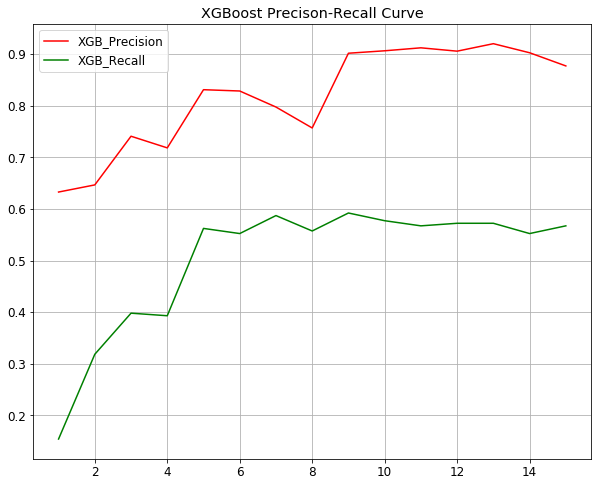

In [0]:
m_ = range(1,16)
x_ = m_[::-1]
plt.figure(figsize=[10,8]) 
plt.plot(x_,XGB_Precision,'r',label="XGB_Precision")
plt.plot(x_,XGB_Recall,'g',label="XGB_Recall")
plt.title("XGBoost Precison-Recall Curve")
plt.grid()
plt.legend()

# Task 3. Bayesian methods (1 point)

In this task you are asked to compare the performance of the common Ridge Regression with its the parameters chosen using cross-validation technique and Bayesian Ridge Regression. 

In particular, using [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html), find the optimal value for the reguralization coefficient in the ridge regression optimization problem formulation. Then train [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression) and compare the absolute error and learnt coefficients distribution for both variants and make some conclusions on both methods.

**The task:** 
* Use crossvalidation technique to choose the optimal value of reguralization coefficent for Ridge Regression model. (**Note:** "optimal" value here, means the one that lets the model with this particular parameter value achieve better performance compared to the other variants). 
* Fit Bayesian Ridge Regression model 
* Plot the absolute error historgramms for both models using [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html).
* Plot historgrams of coefficients of regression derived from both models (in cross-validation case the coefficients of the best model)
* Compare the two pairs of histrograms. Are they the same or different? Why? What are the prons and cons of both methods?

In [0]:
import sklearn.datasets as dt
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [0]:
X,y = dt.load_boston(return_X_y=True)
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [54]:
#Use crossvalidation technique to choose the optimal 
#value of reguralization coefficent for Ridge Regression model

params = [{'alpha': [1e-10, 1e-8,1e-5,1e-2,1,5,10,20]
           }]

clf_Ridge = GridSearchCV(Ridge(),
                    params, n_jobs=-1, 
                    error_score='neg_mean_absolute_error',
                    cv = 5)
clf_Ridge.fit(X_train, y_train)
Ridge_MAE = mean_absolute_error(y_test, clf_Ridge.predict(X_test))
print("Optimal: " ,clf_Ridge.best_params_)
print("RidgeCV_MAE :" ,clf_Ridge.best_score_)

Optimal:  {'alpha': 20}
RidgeCV_MAE : 0.3582657080620887


In [55]:
#Fit Bayesian Ridge Regression model
clf_BR = BayesianRidge(compute_score=True)
clf_BR.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [0]:
#Plot the absolute error historgramms for both models using
Ridge_Abs = abs(y_test - (clf_Ridge.predict(X_test))) 
Bayes_Abs = abs(y_test - (clf_BR.predict(X_test))) 

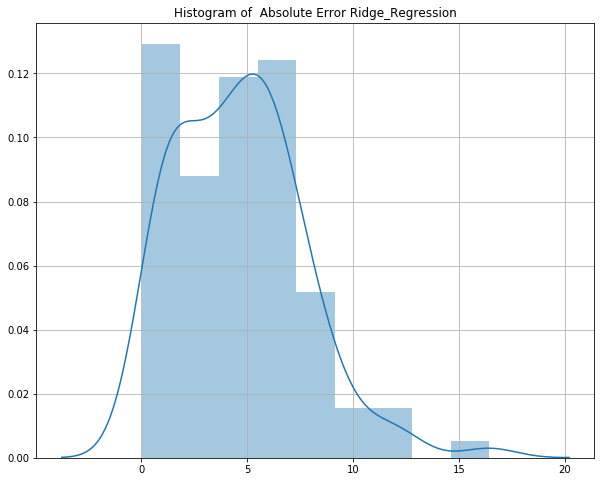

In [61]:
fig, axes = plt.subplots(figsize=(10,8))
plt.title("Histogram of  Absolute Error Ridge_Regression")
sns.distplot(Ridge_Abs)
plt.grid()

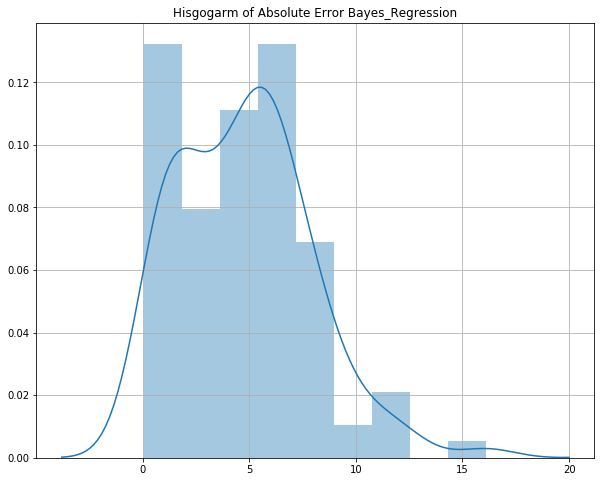

In [62]:
fig, axes = plt.subplots(figsize=(10,8))
plt.title("Hisgogarm of Absolute Error Bayes_Regression")
sns.distplot(Bayes_Abs)
plt.grid()

Text(0.5, 1.0, 'Comparison of Both Histograms')

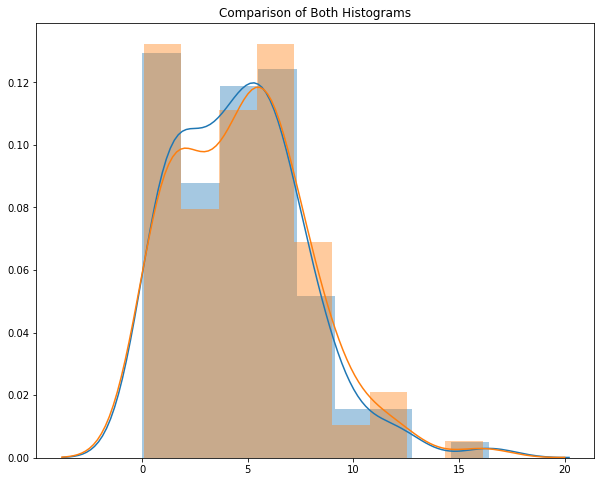

In [66]:

plt.figure(figsize =(10,8))
ax = sns.distplot(Ridge_Abs, label="Ridge")
sns.distplot(Bayes_Abs, ax= ax,label="Bayes_Abs")
plt.title("Comparison of Both Histograms")

- The histogram of the coefficient of regression for both models are different


[-1.74582534e-01  4.98301068e-02 -1.15538696e-02  1.06090914e+00
 -7.99291676e-01  4.21533404e+00 -2.35173443e-03 -1.12314098e+00
  4.63928067e-01 -1.82647777e-02 -6.94204621e-01  4.71216345e-03
 -5.93683884e-01]


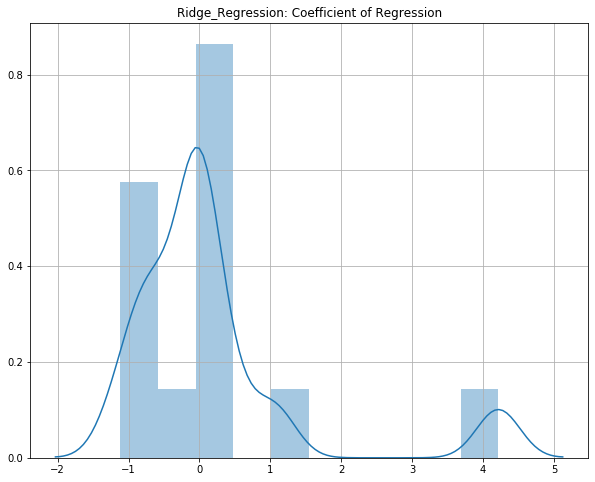

In [67]:
#Plot historgrams of coefficients of regression derived from both models
###YOUR CODE###
print(clf_Ridge.best_estimator_.coef_)
plt.figure(figsize =(10,8))
plt.title("Ridge_Regression: Coefficient of Regression")
sns.distplot(clf_Ridge.best_estimator_.coef_)
plt.grid()


[-1.79483965e-01  4.83062164e-02 -6.48498015e-03  1.28391317e+00
 -1.48189484e+00  4.56469503e+00 -4.73541003e-03 -1.12678449e+00
  4.59865919e-01 -1.77565477e-02 -6.83571548e-01  3.81681439e-03
 -5.65914273e-01]


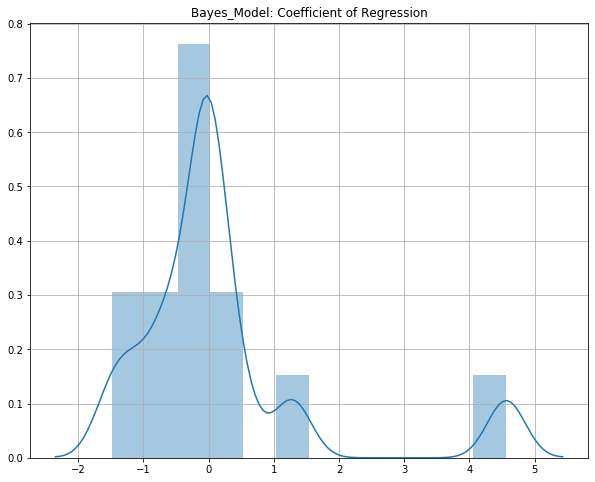

In [69]:
#Plot historgrams of coefficients of regression derived from both models
print(clf_BR.coef_)
plt.figure(figsize =(10,8))
plt.title("Bayes_Model: Coefficient of Regression")
sns.distplot(clf_BR.coef_)
plt.grid()

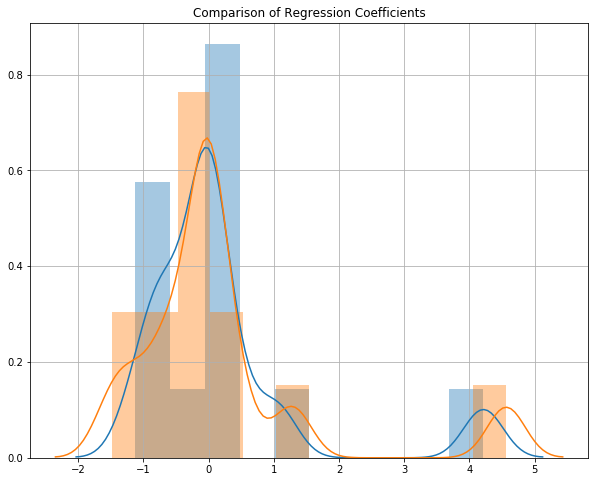

In [71]:

plt.figure(figsize =(10,8))
ax = sns.distplot(clf_Ridge.best_estimator_.coef_, label="Ridge")
sns.distplot(clf_BR.coef_, ax= ax,label="Bayes_Abs")
plt.title("Comparison of Regression Coefficients")
plt.grid()

In [0]:
#- Are they the same or different? Why? What are the prons and cons of both methods?

- The two histograms are slightly different, the range of peak coeffificnet values are not the same, because the procedure of the evaluation these coefficients differs for both methods

- The major pro of the Bayesian Regression is that by the use of its Bayesian processing in its regresson execustion, one can recover the whole range of inferential solutions, rather than a point estimate and a confidence interval as in Ridge regression. 

- Also that Bayesian method helps in specifying priors and posteriors in problems, which gives a deeper understanding of the problem being solved.

- and as a con, Bayesian method has cumputation related issues.


- Ridge Regression has an advantage in analyzing multiple regression data that suffer from multicollinearity.By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

- one con of Ridge regression trades variance for bias. That is, the output from ridge regression is not unbiased. 

# Task 4. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results.Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta model, which uses the predictions of base models as features. This technique is wiledly used in multiple real case scenarios to get better results. One of the main problem of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Train metaclassifier on original datasets features, report score on test.
* Train meta_classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

Write meta classifier function.

In [0]:
import sklearn
fc = sklearn.datasets.fetch_covtype()

In [0]:
X = fc['data']
y = fc['target']

In [0]:
#split it train-test - 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(348607, 54) (348607,)
(232405, 54) (232405,)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ###YOUR CODE###
    #PART_1: Cross validation using the base classifiers on the Trainset
    #The predictions are stored as the "Meta_Train"
    y_cv_pred = []
    for i in base_clfs:
      cv_pred =  cross_val_predict(i, X_train, y_train, cv=cv)  #CV prediction
      y_cv_pred.append(cv_pred)
    meta_train = np.vstack(y_cv_pred).T 
    

    #PART_2: Fitting the base Classifiers onthe Trainset 
    #and predictions are stored as the "Meta_Test"
    test_pred = [] 
    for c in base_clfs:
      c.fit(X_train,y_train)
      test_pred.append(c.predict(X_test))
    meta_test = np.vstack(test_pred).T

    #PART_3: Fitting the Final classifier on the "Meta_train"
    #and testing on the "Meta_Test" to get the final prediction
    final_classifier.fit(meta_train,y_train)
    final_pred = final_classifier.predict(meta_test)
    return final_pred
    #pass


Chose 6 different base models(base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml,features e.t.c) and train them. 

In [0]:
###YOUR CODE###
RF = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=42)
KNN = KNeighborsClassifier(n_neighbors=5)
DT =  DecisionTreeClassifier(max_depth=5,random_state=42)
XGB = XGBClassifier(max_depth=7, n_estimators=200)
RF2 = RandomForestClassifier(n_estimators=200, max_depth=8,random_state=42)
GNB = GaussianNB()



RF.fit(X_train,y_train)
KNN.fit(X_train,y_train)
DT.fit(X_train,y_train)
XGB.fit(X_train,y_train)
RF2.fit(X_train,y_train)
GNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Report individual scores on test set. As a score use accuracy.

In [0]:
###YOUR CODE###
RF_pred  = RF.predict(X_test)
KNN_pred = KNN.predict(X_test)
DT_pred  = DT.predict(X_test)
XGB_pred = XGB.predict(X_test)
RF2_pred = RF2.predict(X_test)
GNB_pred = GNB.predict(X_test)

RF_score_= accuracy_score(y_test,RF_pred)
KNN_score_= accuracy_score(y_test,KNN_pred)
DT_score_= accuracy_score(y_test,DT_pred)
XGB_score_= accuracy_score(y_test,XGB_pred)
RF2_score_= accuracy_score(y_test,RF2_pred)
GNB_score_= accuracy_score(y_test,GNB_pred)

print("Random Forest Score: ", RF_score_)
print("K-Nearest Neigbour Score: ",  KNN_score_)
print("Decision Tree Score: "  , DT_score_)
print("Extreme Gradient Boosting Score: ", XGB_score_)
print("Random Forest2 Score: ", RF2_score_)
print("Gaussian Bayes Score: ", GNB_score_)

Random Forest Score:  0.65633269507971
K-Nearest Neigbour Score:  0.9619457412706267
Decision Tree Score:  0.7026139713001012
Extreme Gradient Boosting Score:  0.8670252361179837
Random Forest2 Score:  0.7229319506895291
Gaussian Bayes Score:  0.45897893763042963


Train metaclassifier on original datasets features. And report score on test.

In [0]:
###YOUR CODE###
final_classifier = LogisticRegression(n_jobs=-1,max_iter=1000,random_state=42)
final_classifier.fit(X_train,y_train)
FC_pred = final_classifier.predict(X_test)
FC_score_= accuracy_score(y_test,FC_pred)
print("Score of MetaClassifier trained on Original Data: ", FC_score_)

Score of MetaClassifier trained on Original Data:  0.6861169079839075


Train meta_classifier on those base models .

In [0]:
###YOUR CODE###
base_clfs = [RF,KNN,DT,XGB,RF2,GNB]
cv = 5
final_pred = meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv)

Report score(accuracy) on test. 

In [0]:
###YOUR CODE###
score_ = accuracy_score(y_test,final_pred)
print("Score of MetaClassifier trained on base Models: ", score_)

Score of MetaClassifier trained on base Models:  0.9388352229943417


Does stacking helped to gain better score?

Your answer

- Stacking gives a better overall score than most of the individual claffisiers,
(although it has a  slightly lower performance than KNN)

- Also, the meta_classifeier score is better when trained on the base_classifiers than when the meta-classifier was fitted on the training set directly,

# Task 5. Gaussian Processes (1 point)

In the following exercise you will need to fit the gaussian process with different kernels on the ```elecricity_conpumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [0]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv('data/elecricity_conpumption_FR.csv')

In [0]:
data.dropna(inplace=True)

In [0]:
y = np.array(data.values)
X = np.array(data.index)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.

In [0]:
###YOUR CODE###
target_scaler = StandardScaler()
target_scaler.fit(y_train)

#Transformed y_target variable
y_ttrain = target_scaler.transform(y_train)
y_ttest = target_scaler.transform(y_test)

Text(0, 0.5, 'Target')

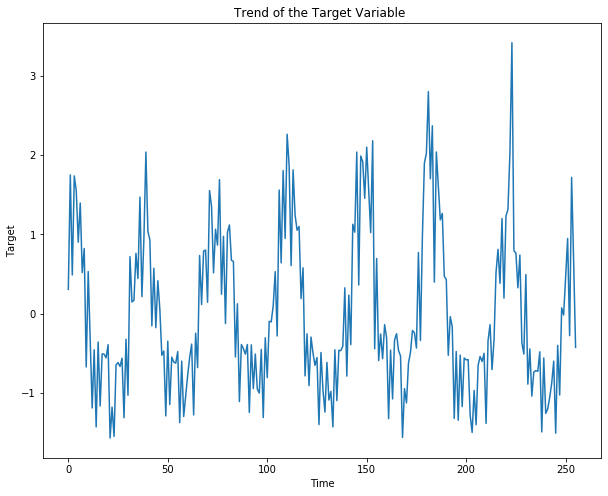

In [0]:
#Plot the resulting target against the time index.
plt.figure(figsize=(10,8))
plt.plot(X_train,y_ttrain)
plt.title("Trend of the Target Variable ")
plt.xlabel("Time")
plt.ylabel("Target")

In [0]:
!pip install GPy
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear,PeriodicExponential
from sklearn.metrics import r2_score
import GPy.kern as kern

     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633970 sha256=1ec6fc2b08f90a0febb906b04dc0971eda0fa5daa642588ab248be01cd43bc16
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=d1780923523f4e1317b473e693259da572e4c9f75d8319bcbb5decdf1061b720
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [0]:
import GPy

* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [0]:
######## Your code here ########
#Kernel combination:                                
k_periodicity = GPy.kern.StdPeriodic(1,period=40)   #StdPeriodic with period == 40
k_noise = GPy.kern.White(1)                         #Addition of noise 
kernel =  k_periodicity + k_noise

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fe4c5b9bd68>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fe4c5b9b5f8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fe4c5b9b860>]]}

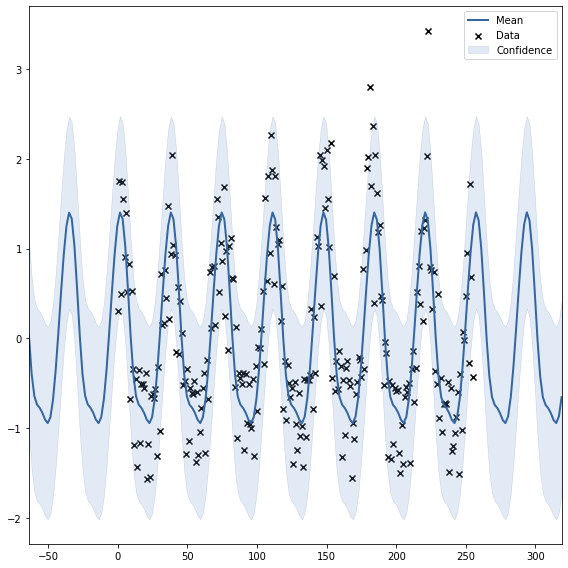

In [0]:
#Model Fitting and plotting
model = GPy.models.GPRegression(X_train, y_ttrain,kernel)
model.optimize()
model.plot(figsize=(8,8))

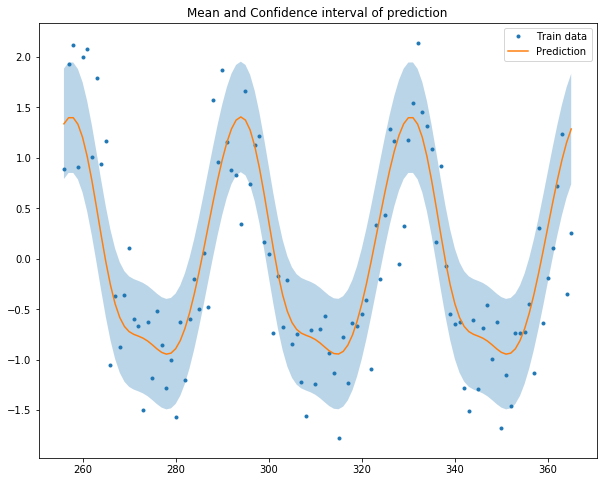

In [0]:
###YOUR CODE###
#Function to plot the mean and confidence interval of prediction
def getmodelplot(X_train, y_train,X_test,y_test, model):
    prediction_mean, prediction_var = model.predict(X_test)
    prediction_std = np.sqrt(prediction_var).ravel()
    prediction_mean = prediction_mean.ravel()
    
    plt.figure(figsize=(10,8))
    plt.plot(X_test, y_ttest, '.', label='Train data')
    plt.plot(X_test, prediction_mean, label='Prediction')
    plt.title("Mean and Confidence interval of prediction")
    plt.fill_between(X_test.ravel(), prediction_mean - prediction_std, prediction_mean + prediction_std, alpha=0.3)
    plt.legend()


getmodelplot(X_train, y_ttrain,X_test,y_ttest, model)

Text(0, 0.5, 'Predicted values')

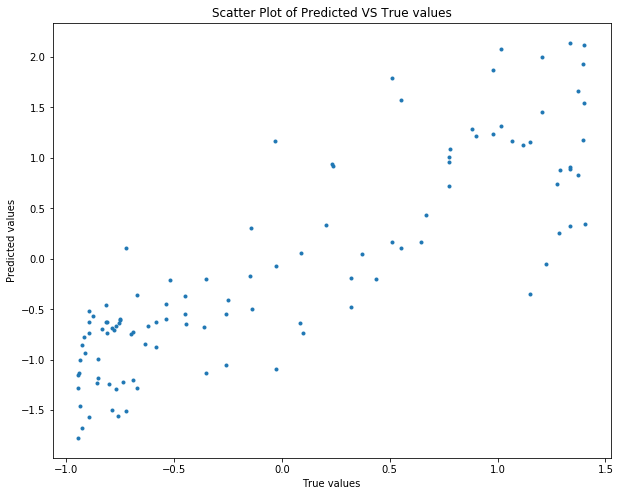

In [0]:
#Inspect them on normality by scatter plot: plot predicted points/time series against true values.
prediction_mean, prediction_var = model.predict(X_test)
prediction_mean = prediction_mean.ravel()
    
plt.figure(figsize=(10,8))
plt.plot(prediction_mean, y_ttest, '.')
plt.title("Scatter Plot of Predicted VS True values")
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [0]:
print ("R2_score: ", r2_score(y_ttest,prediction_mean))

R2_score:  0.7216462644012905
